<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общий-обзор-данных" data-toc-modified-id="Общий-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общий обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Визуализация-данных-и-отбор-признаков" data-toc-modified-id="Визуализация-данных-и-отбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Визуализация данных и отбор признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчёт</a></span></li></ul></div>

## Исследовательский анализ данных

### Общий обзор данных

Импортируем все необходимые библиотеки. 

In [1]:
pip install phik==0.12.0

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

Так как проект выполняется локально, используем конструкцию try-except, чтобы избежать ошибки при чтении файлов: 

In [3]:
try: 
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    contract = pd.read_csv('C:\\Users\\freak\\Desktop\\Python\\Final project\\final_provider\\contract.csv')
    personal = pd.read_csv('C:\\Users\\freak\\Desktop\\Python\\Final project\\final_provider\\personal.csv')
    internet = pd.read_csv('C:\\Users\\freak\\Desktop\\Python\\Final project\\final_provider\\internet.csv')
    phone = pd.read_csv('C:\\Users\\freak\\Desktop\\Python\\Final project\\final_provider\\phone.csv')

Получим общее представление о данных с помощью методов `info` и `head`: 

In [4]:
for data in [contract, personal, internet, phone]:
    print(data.info(), end='\n\n')
    display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Стоит обратить внимание на то, что практически все данные имеют тип `object`. Данные нужно будет преобразовать в тип `int`, чтобы они подходили для обучения модели. Также в рамках хорошего тона стоит переименовать столбцы с учетом "змеиного регистра". 

Аналогичным способом проверим данные на пропуски и явные дубликаты:

In [5]:
for data in [contract, personal, internet, phone]:
    print('')
    print('Проверка на дубли:' f'{data.duplicated().sum()}', end='\n\n')
    print('Проверка на пропуски:', end='\n\n' f'{data.isna().sum()}')
    print('')


Проверка на дубли:0

Проверка на пропуски:

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Проверка на дубли:0

Проверка на пропуски:

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Проверка на дубли:0

Проверка на пропуски:

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Проверка на дубли:0

Проверка на пропуски:

customerID       0
MultipleLines    0
dtype: int64


Пропусков и явных дубликатов не обнаружено.

Посмотрим на количество действующих и ушедших клиентов:

In [6]:
contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Клиенты уходили в последний квартал 2019 года и в начале 2020. Далее статистика по уходам просто отсутствует, т.к. дата выгрузки данных 1 февраля 2020. 

Доля ушедших клиентов:

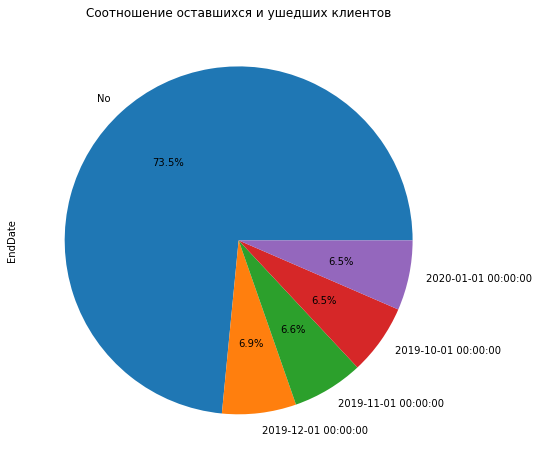

In [7]:
contract['EndDate'].value_counts().plot.pie(labels=contract['EndDate'].unique(),
                                            autopct='%.1f%%',
                                            fontsize=10,
                                            figsize=(8, 8))
plt.title('Соотношение оставшихся и ушедших клиентов');

Соотношение оставшихся и ушедших клиентов приблизительно 3:1. Таким образом, мы иммем дело с дисбалансом классов. Стоит учитывать это при дальнейшей работе. 

### Предобработка данных

Начнем с преобразования типов данных в таблицах. 

**Таблица contract**

In [8]:
contract['BeginDate'] = contract['BeginDate'].astype('datetime64')

In [9]:
contract['MonthlyCharges'] = contract['MonthlyCharges'].astype('float')

Строка ниже выполняется с ошибкой, т.к. в столбце присутствуют неявные пропуски - строки заполнены пробелами `''`. 

In [10]:
#contract['TotalCharges'] = contract['TotalCharges'].astype('float')

In [11]:
display('Пользователи с незаполненным полем TotalCharges:', contract.loc[contract['TotalCharges'] == ' '])

'Пользователи с незаполненным полем TotalCharges:'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Важно обратить внимание на дату заключения договора с этими пользователями (столбец BeginDate): это дата выгрузки данных из базы. Соответственно, это совсем новые пользователи, которые пока не смогли продемонстрировать какое-либо поведение. Их придется удалить, т.к. эти пользователи не представляют ценности для исследования. 

In [12]:
contract.drop(contract[contract['TotalCharges']==" "].index, axis=0, inplace=True)

In [13]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float')

Добавим столбец с фактом ухода клиента:

In [14]:
def churn_fact(churn):
    if churn == 'No':
        category = 0
    else: 
        category = 1
    return category

In [15]:
contract['churn'] = contract['EndDate'].apply(churn_fact).astype('int')

In [16]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


Также добавим столбец `tenure`, где сохраним срок, в течение которого человек являлся клиентом компании:

In [17]:
DOWNLOAD = '2020-02-01'
contract.loc[contract['EndDate'] == 'No', 'EndDate'] = DOWNLOAD
contract['EndDate'] = contract['EndDate'].astype('datetime64')

In [18]:
contract['tenure'] = (contract['EndDate'] - contract['BeginDate']).dt.days

In [19]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,tenure
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


Теперь столбцы с датой начала и окончания действия договора можно удалить. 

In [20]:
contract.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

В результате всех преобразований таблица `contract` приобрела такой вид: 

In [21]:
contract.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,tenure
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


**Объединение таблиц**

Объединим таблицы и проверим качество объединения. 

In [22]:
data = contract.merge(personal, how='left', on='customerID').merge(internet, how='left', 
                                                                   on='customerID').merge(phone, how='left', on='customerID')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   churn             7032 non-null   int32  
 7   tenure            7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


In [24]:
data.duplicated().sum()

0

In [25]:
data['customerID'].is_unique

True

In [26]:
data.isnull().sum()

customerID             0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
churn                  0
tenure                 0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

Ещё на этапе знакомства с данными было заметно, что количество строк в таблицах отличается. Это происходит потому, что не все клиенты пользуются какими-либо услугами. Логично будет заполнить пропуски значением `No`.  

In [27]:
data = data.fillna('No')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   churn             7032 non-null   int32  
 7   tenure            7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


Столбец с кодом клиента превратим в индекс, чтобы эти данные не участвовали в обучении модели: 

In [29]:
data = data.set_index('customerID')

Внешний вид итоговой таблицы: 

In [30]:
data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,tenure,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Визуализация данных и отбор признаков

Проверим, есть ли разница в размере ежемесячных платежей у оставшихся и ушедших клиентов. 

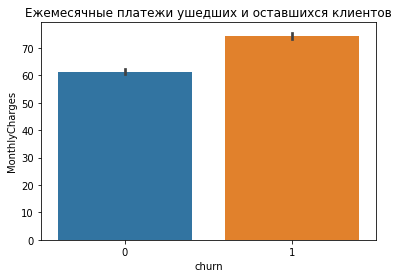

In [31]:
sns.barplot(x='churn', y='MonthlyCharges', data=data).set_title('Ежемесячные платежи ушедших и оставшихся клиентов');

Ушедшие клиенты каждый месяц платили больше, чем оставшиеся.

Посмотрим, как это отразится на сумме общих платежей: 

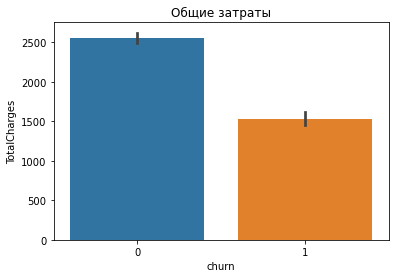

In [32]:
sns.barplot(x='churn', y='TotalCharges', data=data).set_title('Общие затраты');

Здесь ситуация обратная - оставшиеся клиенты суммарно заплатили больше. Скорее всего, это связано с тем, что они дольше пользуются услугами связи. Стоит учесть возможную корреляцию признаков `Total Charges` и `Tenure` при отборе признаков для обучения модели. 

Проверим предположение о том, что оставшиеся клиенты дольше пользуются услугами: 

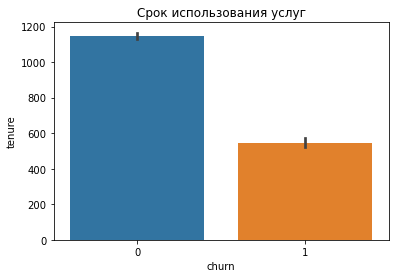

In [33]:
sns.barplot(x='churn', y='tenure', data=data).set_title('Срок использования услуг');

Также логично предположить, что ушедшие клиенты использовали помесячный тип оплаты. Это позволяет быстро отказаться от услуг компании, не дожидаясь окончания более длительного оплаченного периода (1 или 2 года). 

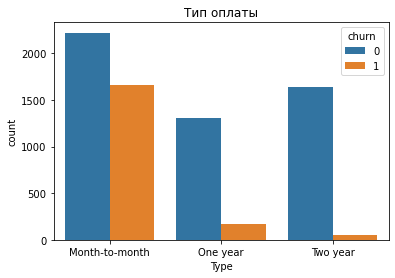

In [34]:
sns.countplot(x='Type', hue='churn', data=data).set_title('Тип оплаты');

Действительно, помесячный тип оплаты в целом является самым популярным. В том числе среди ушедших клиентов. 

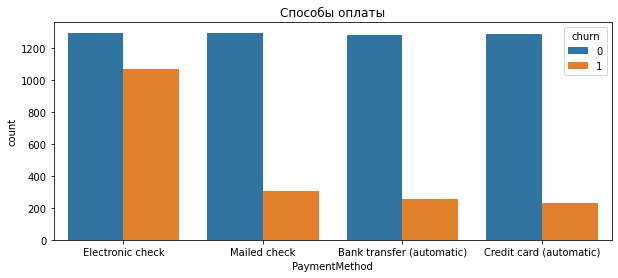

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='churn', data=data).set_title('Способы оплаты');

Также можно было предположить, что клиенты уходят из-за неудобного метода оплаты. Но график этого не подтверждает. Большая часть ушедших клиентов расплачивалась методом 'Electronic check'. Среди оставшихся клиентов сложно выделить какие-то предпочтения. Способы оплаты распределены примерно одинаково. 

Отобразим коэффициенты корреляции количественных данных:

In [36]:
cor_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']
display(data[cor_columns].corr())

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651065,0.246715
TotalCharges,0.651065,1.000000,0.825811
tenure,0.246715,0.825811,1.000000


Корреляция между `TotalCharges` и `tenure` 0.82. Это уже было описано выше - чем дольше клиент пользуется услугами, тем больше сумма платежей за весь период времени. Столбец `TotalCharges` нужно будет удалить, чтобы модель не обучалась на этих данных.

Посмотрим на корреляцию между уходом клиента, использованием дополнительных услуг и персональными данными:

In [37]:
cols_to_keep = ['Type', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
                
df = data[cols_to_keep]

In [38]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

In [39]:
phik_overview = df.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

,Type,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn,gender,SeniorCitizen,Partner,Dependents
Type,1.00,0.28,0.50,0.15,0.10,0.14,0.18,0.07,0.07,0.25,0.00,0.09,0.18,0.15
PaymentMethod,0.28,1.00,0.32,0.26,0.28,0.31,0.27,0.38,0.38,0.45,0.00,0.29,0.24,0.22
InternetService,0.50,0.32,1.00,0.24,0.23,0.23,0.24,0.27,0.27,0.20,0.00,0.16,0.00,0.11
OnlineSecurity,0.15,0.26,0.24,1.00,0.43,0.42,0.53,0.27,0.29,0.26,0.02,0.06,0.22,0.12
OnlineBackup,0.10,0.28,0.23,0.43,1.00,0.46,0.44,0.43,0.42,0.13,0.01,0.10,0.22,0.03
DeviceProtection,0.14,0.31,0.23,0.42,0.46,1.00,0.50,0.57,0.59,0.10,0.00,0.09,0.24,0.01
TechSupport,0.18,0.27,0.24,0.53,0.44,0.50,1.00,0.42,0.43,0.25,0.00,0.09,0.19,0.10
StreamingTV,0.07,0.38,0.27,0.27,0.43,0.57,0.42,1.00,0.74,0.10,0.00,0.16,0.19,0.02
StreamingMovies,0.07,0.38,0.27,0.29,0.42,0.59,0.43,0.74,1.00,0.09,0.00,0.19,0.18,0.06
churn,0.25,0.45,0.20,0.26,0.13,0.10,0.25,0.10,0.09,1.00,0.00,0.23,0.23,0.25


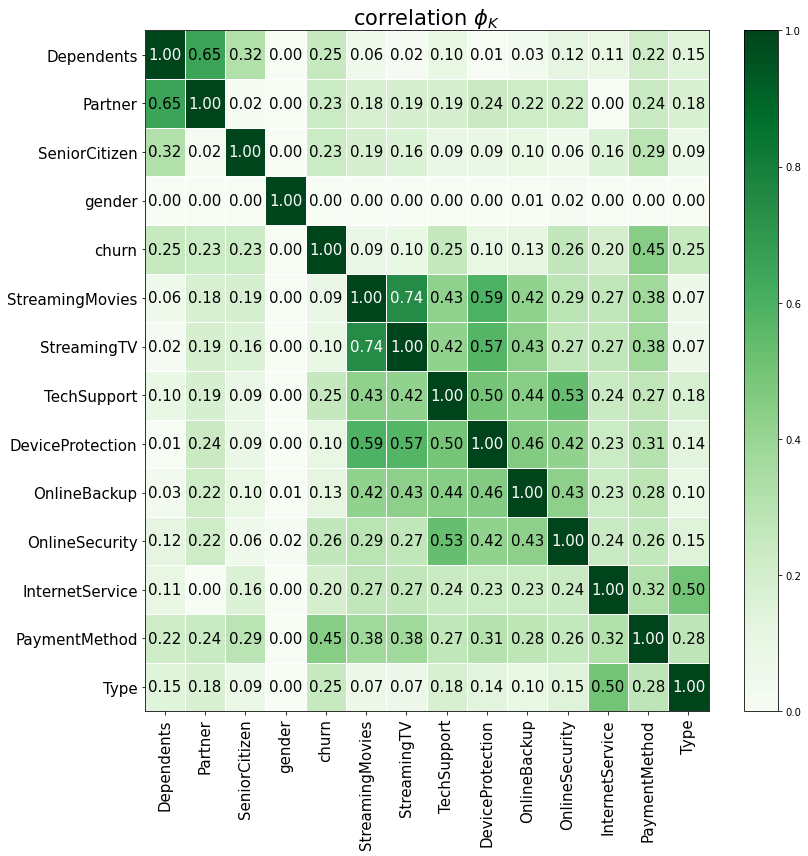

In [40]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(12, 12))
plt.tight_layout()

С точки зрения ухода клиента самый значительный коэффициент можно увидеть между уходом и использованием интернета. Использование остальных услуг не оказывает значительного влияния на уход пользователя. Возможно, соотношение цены и качества интернета не устроило ушедших клиентов. 

Пол, пенсионный статус, наличие партнера и иждивенцев не оказывают влияния на уход клиента. Столбец `gender` можно удалить, т.к. корреляция между уходом и полом клиента равна нулю. 

## Обучение моделей

### Подготовка данных для обучения

Удалим ненужные столбцы: 

In [41]:
data_final = data.drop(['TotalCharges', 'gender'], axis=1)

При знакомстве с данными можно было заметить дисбаланс классов. Оставшихся клиентов в три раза больше, чем ушедших. Тем не менее, методы борьбы с дисбалансом нецелесообразны с точки зрения оптимизации целевой метрики ROC AUC. 

In [42]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   churn             7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  MultipleLines     7032 non-null 

In [43]:
data_final_ohe = pd.get_dummies(data_final, drop_first=True)

In [44]:
data_final_ohe

,MonthlyCharges,churn,tenure,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,29.85,0,31,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5575-GNVDE,56.95,0,1036,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3668-QPYBK,53.85,1,61,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
7795-CFOCW,42.30,0,1371,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
9237-HQITU,70.70,1,61,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,84.80,0,730,0,1,0,1,0,0,1,...,1,0,0,1,0,1,1,1,1,1
2234-XADUH,103.20,0,2191,0,1,0,1,1,0,0,...,1,1,0,0,1,1,0,1,1,1
4801-JZAZL,29.60,0,337,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [45]:
target = data_final_ohe['churn'] 
features = data_final_ohe.drop('churn', axis=1)

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=120922)

Размеры выборок: 

In [47]:
print('Обучающая выборка')
print(features_train.shape)
print(target_train.shape)

Обучающая выборка
(5274, 20)
(5274,)


In [48]:
print('Тестовая выборка')
print(features_test.shape)
print(target_test.shape)

Тестовая выборка
(1758, 20)
(1758,)


### Логистическая регрессия

In [49]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1','l2']}

model_LR = LogisticRegression(random_state=120922, n_jobs=-1)

grid_search_LR = GridSearchCV(model_LR, param_grid, cv=5, scoring='roc_auc')
grid_search_LR.fit(features_train, target_train)

print(grid_search_LR.best_params_)

C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\freak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_v

{'C': 1, 'penalty': 'l2'}


C:\Users\freak\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.81510143        nan 0.83490374        nan 0.84101971
        nan 0.84201609        nan 0.84197532        nan 0.8412652
        nan 0.84153683]
  warnings.warn(


In [50]:
accuracy_lr = cross_val_score(grid_search_LR.best_estimator_, features_train, target_train, cv=5, scoring='accuracy').mean()
print(f'ROC-AUC на кросс-валидации: {grid_search_LR.best_score_:.2f}')
print(f'Accuracy для Логистической регрессии: {accuracy_lr:.2f}')

ROC-AUC на кросс-валидации: 0.84
Accuracy для Логистической регрессии: 0.80


### Случайный лес

In [51]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 6, 8],
    'min_samples_leaf': [2, 6, 8],
    'n_estimators': [10, 50, 100]}

forest_model = RandomForestClassifier(random_state=120922)

grid_search_RF = GridSearchCV(forest_model, param_grid, cv=5, scoring='roc_auc')
grid_search_RF.fit(features_train, target_train)

print(grid_search_RF.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


In [52]:
accuracy_forest = cross_val_score(grid_search_RF.best_estimator_, features_train, target_train, cv=5, scoring='accuracy').mean()
print(f'ROC-AUC на кросс-валидации: {grid_search_RF.best_score_:.2f}')
print(f'Accuracy для Случайного леса: {accuracy_forest:.2f}')

ROC-AUC на кросс-валидации: 0.86
Accuracy для Случайного леса: 0.81


### CatBoost 

In [53]:
%%time
param_grid = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04],
    'iterations': [50, 100, 500, 1000],
    'depth': [2, 3, 4]}

cat_model = CatBoostClassifier(random_state=120922, verbose=0, eval_metric = 'AUC')

grid_search_cat = GridSearchCV(cat_model, param_grid, cv=5, scoring='roc_auc')
grid_search_cat.fit(features_train, target_train)

print(grid_search_cat.best_params_)

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.04}
Wall time: 1min 54s


In [54]:
accuracy_cat = cross_val_score(grid_search_cat.best_estimator_, features_train, target_train, cv=5, scoring='accuracy').mean()
print(f'ROC-AUC на кросс-валидации: {grid_search_cat.best_score_:.2f}')
print(f'Accuracy для CatBoost: {accuracy_cat:.2f}')

ROC-AUC на кросс-валидации: 0.92
Accuracy для CatBoost: 0.87


In [55]:
probalities_pred_cat = roc_auc_score(target_test, grid_search_cat.best_estimator_.predict_proba(features_test)[:, 1])
print(f'ROC-AUC для CatBoost на тестовой выборке: {probalities_pred_cat:.2f}')

ROC-AUC для CatBoost на тестовой выборке: 0.92


Наилучший результат показывает модель CatBoost со следующими гиперпараметрами: 

`{'depth': 4, 'iterations': 1000, 'learning_rate': 0.04}`.

**Значение ROC AUC на кросс-валидации аналогично показателями, полученным при проверке модели CatBoost на тестовой выборке: 0.92** 